##### Import necessary library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings("ignore")

##### Import a 311 NYC service request.

In [2]:
df=pd.read_csv("E:/e drive data\Data science with python/Data-Science-with-Python-Project-2--master/Data-Science-with-Python-Project-2--master/311_Service_Requests_from_2010_to_Present.csv")
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [3]:
df.shape

(300698, 53)

In [4]:
df.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2164
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          5914
Location Type                        131
Incident Zip                        2615
Incident Address                   44410
Street Name                        44410
Cross Street 1                     49279
Cross Street 2                     49779
Intersection Street 1             256840
Intersection Street 2             257336
Address Type                        2815
City                                2614
Landmark                          300349
Facility Type                       2171
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2187
Community Board                        0
Borough         

In [5]:
df.drop(columns=["Vehicle Type"],inplace=True)
df.drop(columns=["School or Citywide Complaint","Taxi Company Borough","Taxi Pick Up Location","Bridge Highway Name"],inplace=True)
df.drop(columns=["Bridge Highway Direction","Road Ramp","Bridge Highway Segment","Garage Lot Name","Ferry Direction","Ferry Terminal Name"],inplace=True)
df.drop(columns=["Intersection Street 1","Intersection Street 2","Landmark"],inplace=True)

In [6]:
df.fillna({"Location Type":"Unknown Location","City":"Unknown City"},inplace=True)

In [7]:
df.isnull().sum()

Unique Key                            0
Created Date                          0
Closed Date                        2164
Agency                                0
Agency Name                           0
Complaint Type                        0
Descriptor                         5914
Location Type                         0
Incident Zip                       2615
Incident Address                  44410
Street Name                       44410
Cross Street 1                    49279
Cross Street 2                    49779
Address Type                       2815
City                                  0
Facility Type                      2171
Status                                0
Due Date                              3
Resolution Description                0
Resolution Action Updated Date     2187
Community Board                       0
Borough                               0
X Coordinate (State Plane)         3540
Y Coordinate (State Plane)         3540
Park Facility Name                    0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 39 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300698 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

##### Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype and create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing

In [9]:
df["Created Date"]=df["Created Date"].astype("datetime64")
df["Closed Date"]=df["Closed Date"].astype("datetime64")

In [10]:
df.dtypes

Unique Key                                 int64
Created Date                      datetime64[ns]
Closed Date                       datetime64[ns]
Agency                                    object
Agency Name                               object
Complaint Type                            object
Descriptor                                object
Location Type                             object
Incident Zip                             float64
Incident Address                          object
Street Name                               object
Cross Street 1                            object
Cross Street 2                            object
Address Type                              object
City                                      object
Facility Type                             object
Status                                    object
Due Date                                  object
Resolution Description                    object
Resolution Action Updated Date            object
Community Board     

In [11]:
df["Request_Closing_Time"]=df["Closed Date"]-df["Created Date"]

In [12]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,School Phone Number,School Address,School City,School State,School Zip,School Not Found,Latitude,Longitude,Location,Request_Closing_Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",0 days 00:55:15
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",0 days 01:26:16
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",0 days 04:51:31
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",0 days 07:45:14
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",0 days 03:27:02


In [13]:
df.Request_Closing_Time.head()

0   0 days 00:55:15
1   0 days 01:26:16
2   0 days 04:51:31
3   0 days 07:45:14
4   0 days 03:27:02
Name: Request_Closing_Time, dtype: timedelta64[ns]

In [14]:
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Address Type', 'City', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'Latitude', 'Longitude', 'Location',
       'Request_Closing_Time'],
      dtype='object')

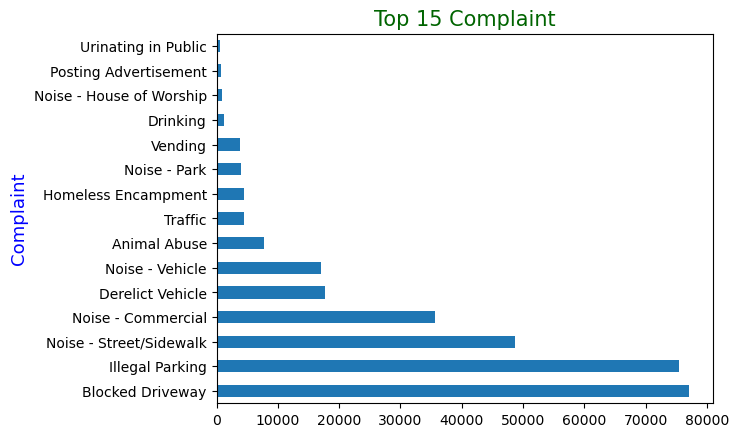

In [15]:
# top 15 complaint type
df["Complaint Type"].value_counts().nlargest(15).plot.barh()
plt.title("Top 15 Complaint",size=15,c="darkgreen")
plt.ylabel("Complaint",size=13,c="b",rotation=90)
plt.show()

Closed      298471
Open          1439
Assigned       786
Draft            2
Name: Status, dtype: int64


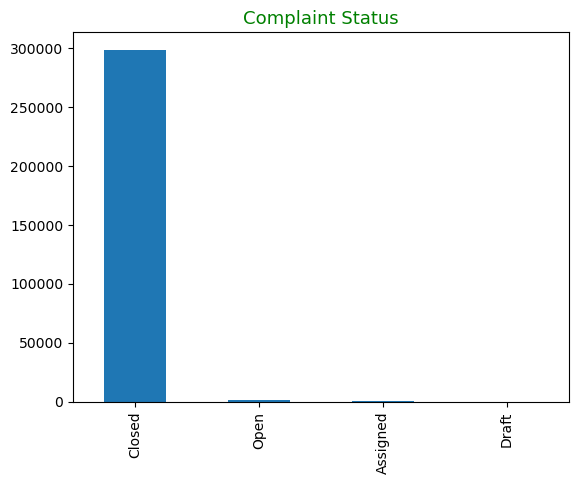

In [16]:
print(df.Status.value_counts())
df.Status.value_counts().plot.bar()
plt.title("Complaint Status",size=13,c="g")

plt.show()

Complaint Type
Animal Abuse                   8
Bike/Roller/Skate Chronic      2
Blocked Driveway             152
Derelict Vehicle             106
Drinking                       5
Ferry Complaint                2
Homeless Encampment            2
Illegal Parking              589
Noise - Commercial           176
Noise - House of Worship       2
Noise - Park                  10
Noise - Street/Sidewalk      342
Noise - Vehicle               31
Panhandling                    1
Posting Advertisement          2
Traffic                        3
Vending                        6
Name: Status, dtype: int64


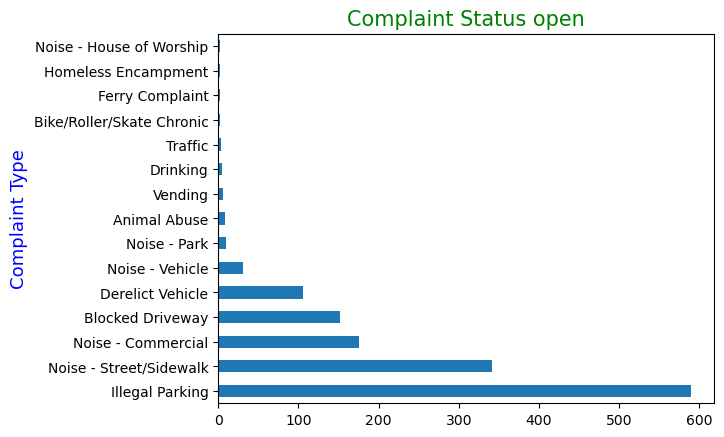

In [17]:
# Complaint status are still open
print(df[df.Status=="Open"].groupby(["Complaint Type"]).Status.count())
df[df.Status=="Open"].groupby(["Complaint Type"]).Status.count().nlargest(15).plot.barh()
plt.title("Complaint Status open",size=15,c="g")
plt.ylabel("Complaint Type",size=13,c="b")
plt.show()

In [18]:
df1=df.rename({"Complaint Type":"Complaint_Type"},axis=1)

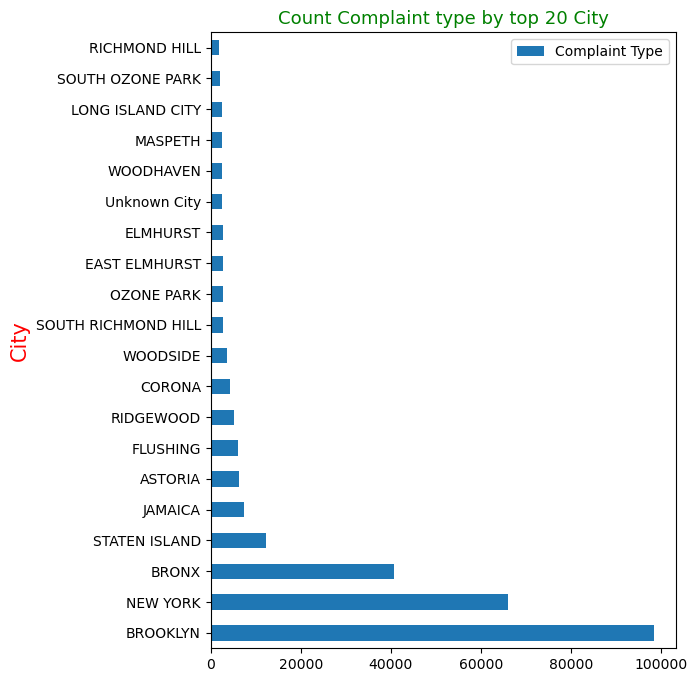

In [19]:
# City wise Complaint Count
df1.groupby("City").Complaint_Type.count().nlargest(20).plot.barh(figsize=(6,8))
plt.title("Count Complaint type by top 20 City",size=13,c="g")
plt.ylabel("City",size=15,c="r")
plt.legend(["Complaint Type"])
plt.show()

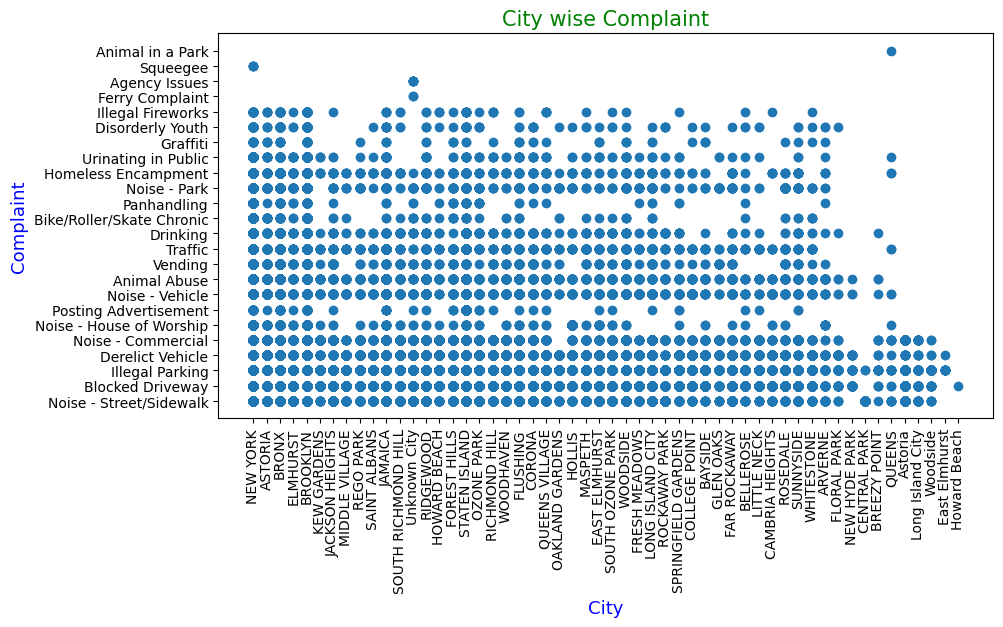

In [20]:
plt.figure(figsize=(10,5))
plt.scatter(df["City"],df["Complaint Type"])
plt.xticks(rotation=90)
plt.title("City wise Complaint",size=15,c="g")
plt.xlabel("City",size=13,c="blue")
plt.ylabel("Complaint",size=13,c="blue")
plt.show()

In [21]:
df["Location Type"].value_counts()

Street/Sidewalk               249299
Store/Commercial               20381
Club/Bar/Restaurant            17360
Residential Building/House      6960
Park/Playground                 4773
House of Worship                 929
Residential Building             227
Highway                          215
Unknown Location                 131
Parking Lot                      117
House and Store                   93
Vacant Lot                        77
Commercial                        62
Roadway Tunnel                    35
Subway Station                    34
Bridge                             2
Terminal                           1
Ferry                              1
Park                               1
Name: Location Type, dtype: int64

In [22]:
df.groupby(by=["Complaint Type","Location Type"]).Request_Closing_Time.mean().nlargest(30)

Complaint Type       Location Type             
Animal in a Park     Park                                  14 days 00:50:05
Derelict Vehicle     Roadway Tunnel                         0 days 17:57:51
Graffiti             Street/Sidewalk                 0 days 12:02:15.080000
Noise - Park         Unknown Location                       0 days 10:23:00
Homeless Encampment  Unknown Location             0 days 08:25:45.666666666
Derelict Vehicle     Highway                      0 days 08:11:44.538461538
Urinating in Public  Club/Bar/Restaurant                    0 days 07:55:12
Derelict Vehicle     Vacant Lot                   0 days 07:28:26.129870129
                     Street/Sidewalk              0 days 07:21:38.166885902
                     Unknown Location                0 days 06:03:47.875000
Graffiti             Residential Building/House   0 days 05:52:43.678571428
                     Store/Commercial                0 days 05:33:38.312500
Animal Abuse         Parking Lot        

In [23]:
# the average response time across complaint types
df.groupby(by="Complaint Type").Request_Closing_Time.mean()

Complaint Type
Agency Issues               0 days 05:15:37.166666666
Animal Abuse                0 days 05:12:47.677780638
Animal in a Park                     14 days 00:50:05
Bike/Roller/Skate Chronic   0 days 03:45:59.264150943
Blocked Driveway            0 days 04:44:27.258638198
Derelict Vehicle            0 days 07:21:50.902717762
Disorderly Youth            0 days 03:33:30.902097902
Drinking                    0 days 03:51:42.598431372
Ferry Complaint                                   NaT
Graffiti                    0 days 07:09:04.504424778
Homeless Encampment         0 days 04:21:56.052536231
Illegal Fireworks           0 days 02:45:40.101190476
Illegal Parking             0 days 04:30:04.145454301
Noise - Commercial          0 days 03:08:49.755979232
Noise - House of Worship    0 days 03:11:35.874058127
Noise - Park                0 days 03:24:38.636996519
Noise - Street/Sidewalk     0 days 03:26:42.806681088
Noise - Vehicle             0 days 03:35:20.376269594
Panhandling  

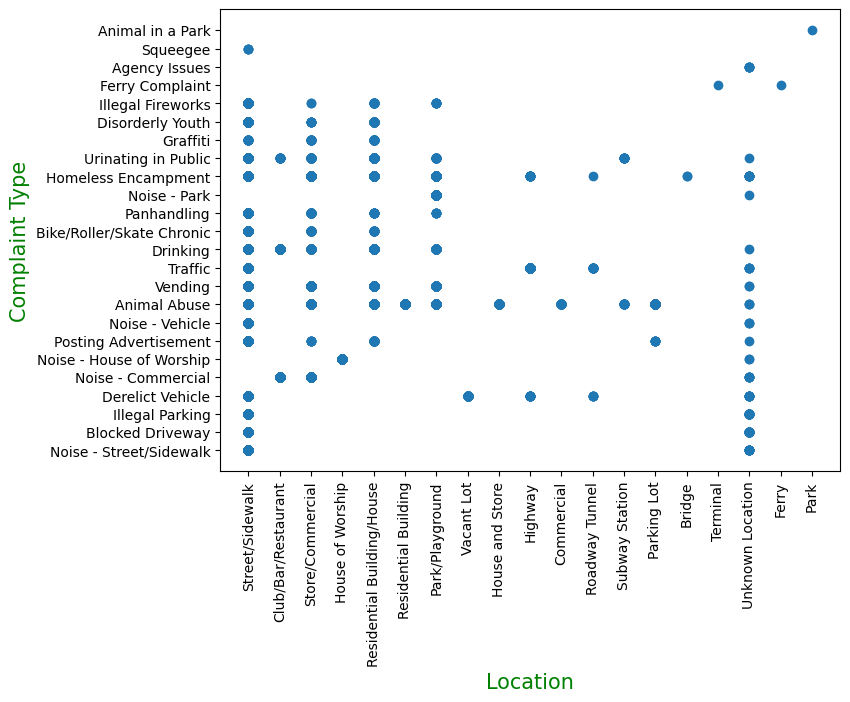

In [24]:
# Complaint Type Based Location
plt.figure(figsize=(8,6))
plt.scatter(x=df["Location Type"],y=df["Complaint Type"])
plt.xticks(rotation=90)
plt.xlabel("Location",c="g",size=15)
plt.ylabel("Complaint Type",c="g",size=15)
plt.show()